<a href="https://colab.research.google.com/github/Ramaprasad89/final-year-project/blob/main/final_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and Load Data**
 In this step, we import the necessary Python libraries for data manipulation (Pandas), visualization (Seaborn, Matplotlib), and machine learning (Scikit-Learn). We then load the dataset into a DataFrame and inspect its structure to understand the columns and data types.

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Load the dataset
# Ensure 'lung_cancer_dataset.csv' is in your current working directory
df = pd.read_csv('lung_cancer_dataset.csv')

In [ ]:
# Display basic information and the first few rows
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   pack_years                 50000 non-null  float64
 4   radon_exposure             50000 non-null  object 
 5   asbestos_exposure          50000 non-null  object 
 6   secondhand_smoke_exposure  50000 non-null  object 
 7   copd_diagnosis             50000 non-null  object 
 8   alcohol_consumption        33338 non-null  object 
 9   family_history             50000 non-null  object 
 10  lung_cancer                50000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.2+ MB
None

First 5 rows of the dataset:


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


# **Data Preprocessing and Cleaning**
Markdown Cell: Here we clean the data to make it suitable for machine learning.

Drop Irrelevant Columns: The patient_id column is a unique identifier and does not contribute to the prediction, so it is removed.

Handle Missing Values: We identified that alcohol_consumption contains missing values (likely representing "None"). We fill these with the category 'None'.

Encoding: Machine learning models require numerical input.

Binary Encoding: Columns like gender, lung_cancer, and family_history are mapped to 0 and 1.

Ordinal Encoding: Columns with a clear hierarchy (radon_exposure, alcohol_consumption) are mapped to ordered integers (e.g., Low=0, Medium=1, High=2).

In [ ]:
# 1. Drop irrelevant column
if 'patient_id' in df.columns:
    df = df.drop('patient_id', axis=1)

# 2. Handle Missing Values
# Impute NaN values in 'alcohol_consumption' with 'None'
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('None')

# 3. Encoding Categorical Variables

# Manual mapping for Ordinal variables to preserve order
radon_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['radon_exposure'] = df['radon_exposure'].map(radon_map)

alcohol_map = {'None': 0, 'Moderate': 1, 'Heavy': 2}
df['alcohol_consumption'] = df['alcohol_consumption'].map(alcohol_map)

# Binary Mapping for Nominal variables
binary_mapping = {'Yes': 1, 'No': 0}
cols_to_map = ['asbestos_exposure', 'secondhand_smoke_exposure',
               'copd_diagnosis', 'family_history', 'lung_cancer']

for col in cols_to_map:
    df[col] = df[col].map(binary_mapping)

# Map Gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Verify the transformation
print("Data after preprocessing:")
print(df.head())

Data after preprocessing:
   age  gender  pack_years  radon_exposure  asbestos_exposure  \
0   69       0   66.025244               2                  0   
1   32       1   12.780800               2                  0   
2   89       1    0.408278               1                  1   
3   78       1   44.065232               0                  0   
4   38       1   44.432440               1                  1   

   secondhand_smoke_exposure  copd_diagnosis  alcohol_consumption  \
0                          0               1                    1   
1                          1               1                    1   
2                          1               1                    0   
3                          1               0                    1   
4                          0               1                    0   

   family_history  lung_cancer  
0               0            0  
1               1            1  
2               0            1  
3               0            1  
4  

# **Exploratory Data Analysis (EDA)**
Markdown Cell: We perform EDA to visualize relationships between variables.

Correlation Heatmap: Checks how strongly different features are related to each other and the target variable (lung_cancer).

Target Distribution: Checks the balance of the dataset (how many positive vs. negative cancer cases).

Boxplot (Pack Years vs. Cancer): Investigates if patients with lung cancer tend to have higher pack_years (smoking history).

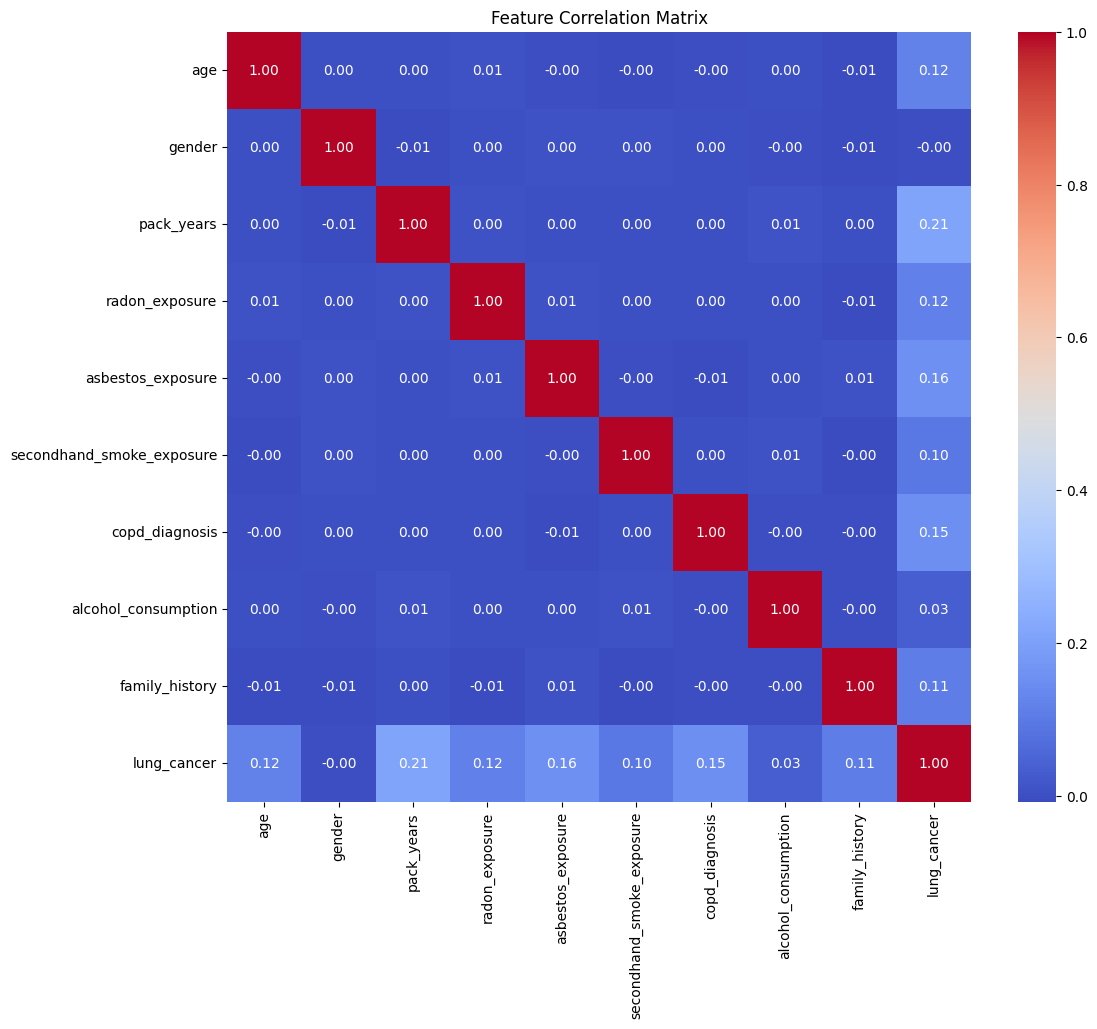

/tmp/ipython-input-1424349179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='lung_cancer', data=df, palette='viridis')


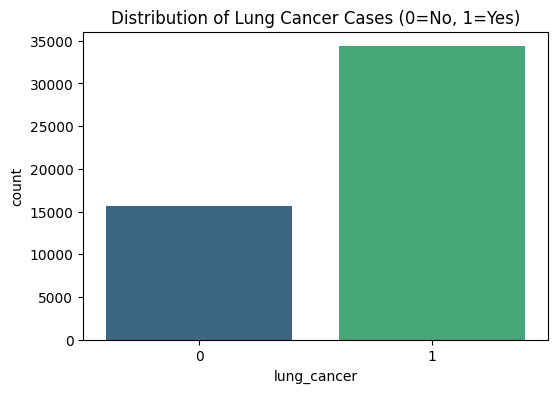

/tmp/ipython-input-1424349179.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lung_cancer', y='pack_years', data=df, palette='Set2')


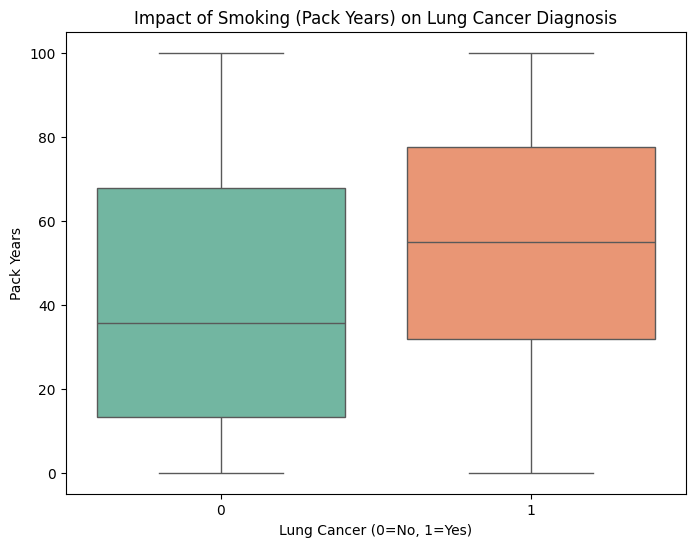

In [ ]:
# 1. Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# 2. Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='lung_cancer', data=df, palette='viridis')
plt.title('Distribution of Lung Cancer Cases (0=No, 1=Yes)')
plt.show()

# 3. Boxplot: Pack Years vs Lung Cancer
plt.figure(figsize=(8, 6))
sns.boxplot(x='lung_cancer', y='pack_years', data=df, palette='Set2')
plt.title('Impact of Smoking (Pack Years) on Lung Cancer Diagnosis')
plt.xlabel('Lung Cancer (0=No, 1=Yes)')
plt.ylabel('Pack Years')
plt.show()

# **Data Split**

In [ ]:
# Define Features (X) and Target (y)
X = df.drop('lung_cancer', axis=1)
y = df['lung_cancer']

# Split into Train and Test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Machine Learning Model BaseLine**

--- Logistic Regression ---
Training Time: 0.0183 seconds
              precision    recall  f1-score   support

           0       0.48      0.67      0.56      3118
           1       0.82      0.67      0.73      6882

    accuracy                           0.67     10000
   macro avg       0.65      0.67      0.65     10000
weighted avg       0.71      0.67      0.68     10000

--- Random Forest ---
Training Time: 5.1681 seconds
              precision    recall  f1-score   support

           0       0.52      0.42      0.46      3118
           1       0.76      0.83      0.79      6882

    accuracy                           0.70     10000
   macro avg       0.64      0.62      0.63     10000
weighted avg       0.68      0.70      0.69     10000

--- Gradient Boosting ---
Training Time: 4.5728 seconds
              precision    recall  f1-score   support

           0       0.64      0.40      0.49      3118
           1       0.77      0.90      0.83      6882

    accuracy    

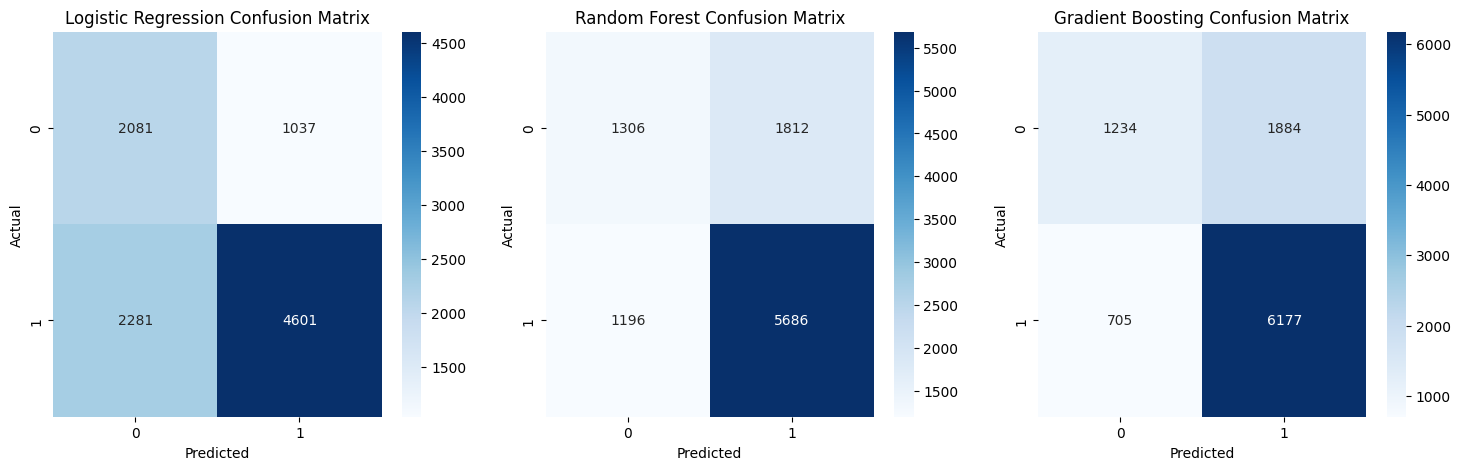

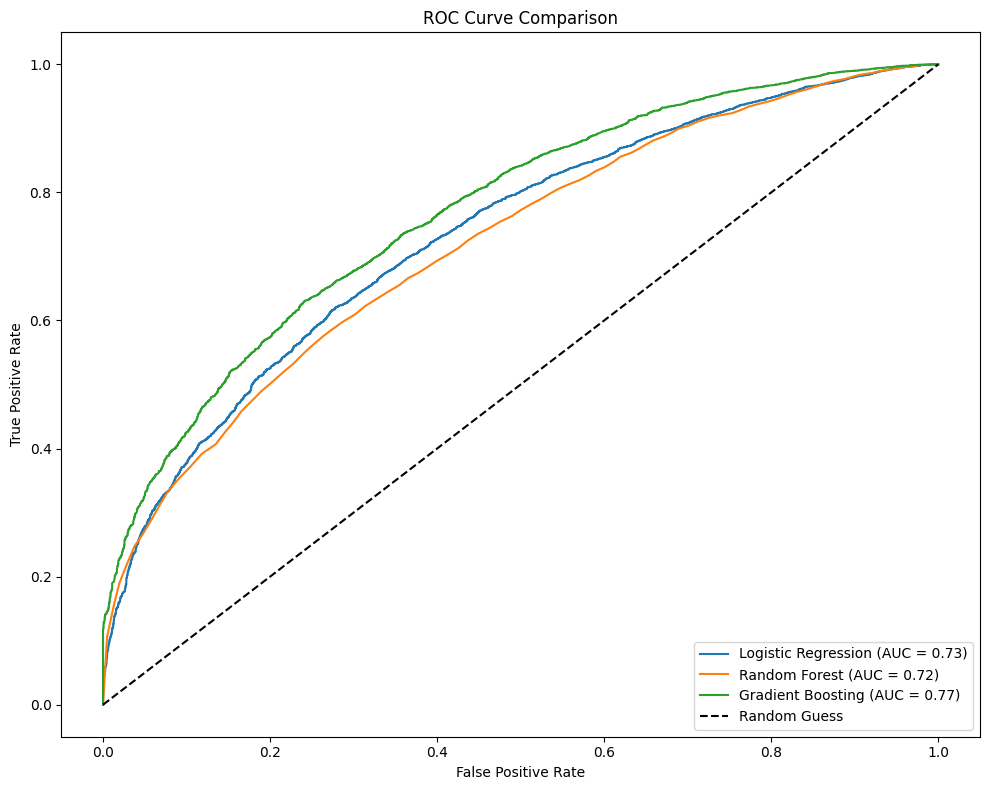


Model Performance Summary:
                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression    0.6682   0.816070  0.668556  0.734984   
1        Random Forest    0.6992   0.758336  0.826213  0.790821   
2    Gradient Boosting    0.7411   0.766282  0.897559  0.826742   

   Training Time (s)  
0           0.018266  
1           5.168103  
2           4.572753  


In [ ]:
# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}
results = []
predictions = {}
probabilities = {}

# Visualization setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt_roc = plt.figure(figsize=(10, 8))
ax_roc = plt_roc.add_subplot(111)

# Train and Evaluate Loop
for i, (name, model) in enumerate(models.items()):
    # Timing
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Predict
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Store for later use (DO NOT REMOVE)
    predictions[name] = y_pred
    probabilities[name] = y_prob

    # Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "Training Time (s)": training_time
    })

    # Print individual report
    print(f"--- {name} ---")
    print(f"Training Time: {training_time:.4f} seconds")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize ROC Plot
ax_roc.plot([0, 1], [0, 1], 'k--', label='Random Guess')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curve Comparison')
ax_roc.legend(loc="lower right")

# Show plots
plt.tight_layout()
plt.show()
plt_roc.show()

# Display Summary Table
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)

# **Machine Learning Model After Feature Engineering**

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.50      0.66      0.57      3118
           1       0.82      0.69      0.75      6882

    accuracy                           0.69     10000
   macro avg       0.66      0.68      0.66     10000
weighted avg       0.72      0.69      0.69     10000

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.55      0.42      0.47      3118
           1       0.76      0.84      0.80      6882

    accuracy                           0.71     10000
   macro avg       0.65      0.63      0.64     10000
weighted avg       0.69      0.71      0.70     10000

--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.64      0.39      0.49      3118
           1       0.77      0.90      0.83      6882

    accuracy                           0.74     10000
   macro avg       0.70      0.65      0.66     1000

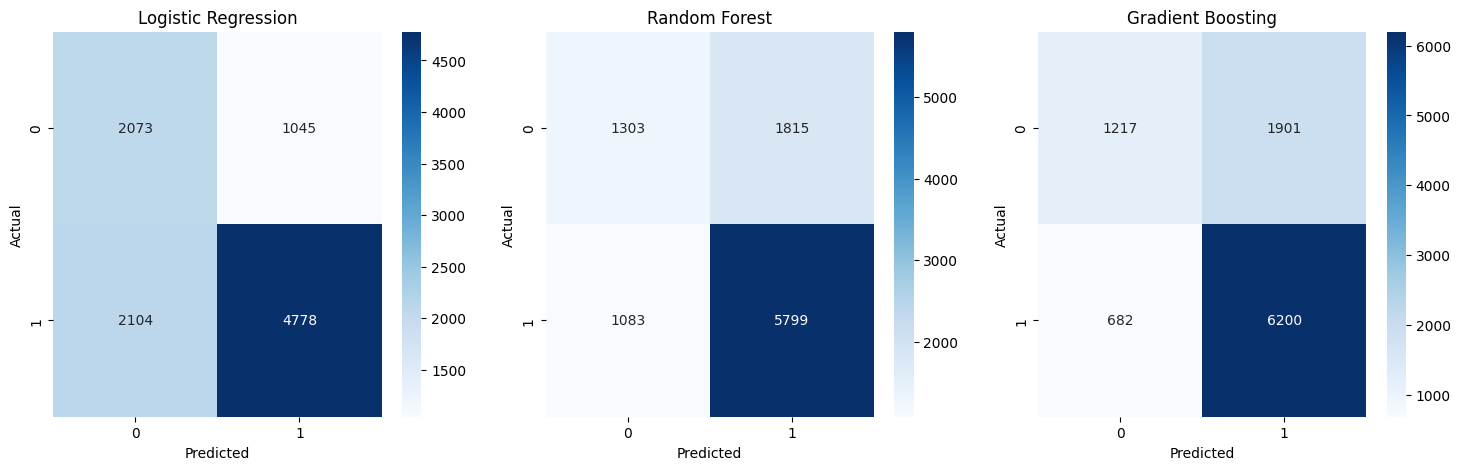

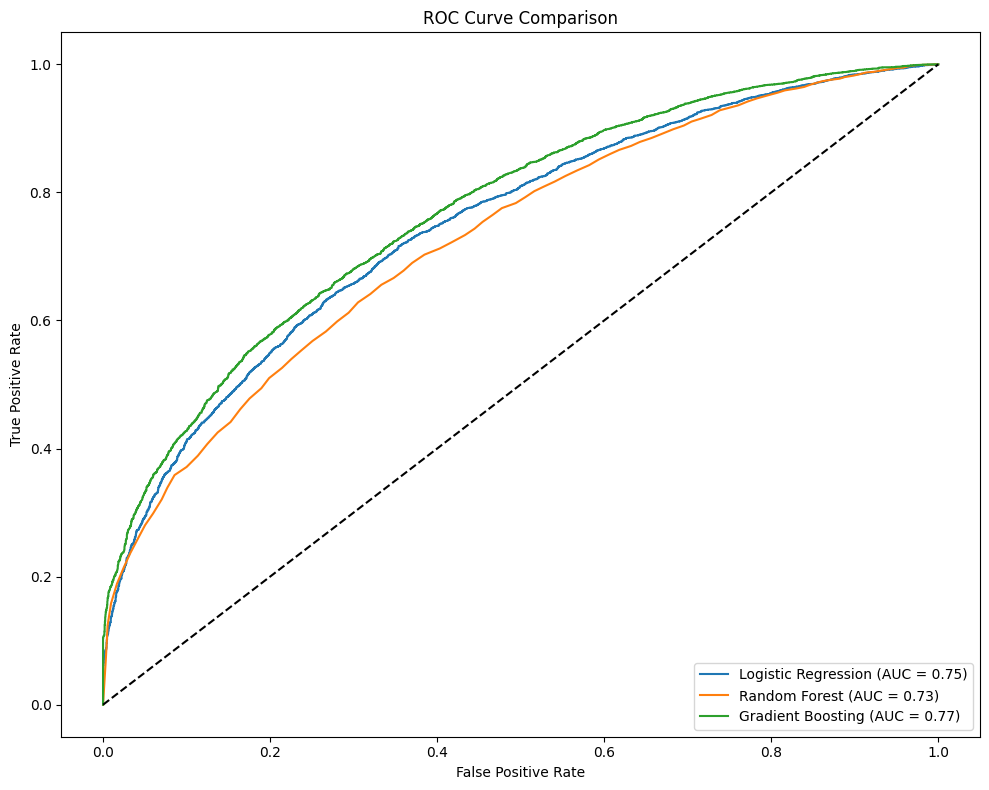


Model Comparison (After Feature Engineering):
                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression    0.6851   0.820539  0.694275  0.752145   
1        Random Forest    0.7102   0.761623  0.842633  0.800083   
2    Gradient Boosting    0.7417   0.765338  0.900901  0.827605   

   Training Time (s)  
0           0.133282  
1           7.181524  
2           8.718459  


In [ ]:
# --- Feature Engineering
# 1. Interaction Term: Age * Pack Years
df['interaction_age_smoke'] = df['age'] * df['pack_years']

# 2. Total Risk Score: Sum of all encoded risk factors
# This creates a "Risk Profile" for each patient
df['total_risk_score'] = (
    df['radon_exposure'] +
    df['asbestos_exposure'] +
    df['secondhand_smoke_exposure'] +
    df['copd_diagnosis'] +
    df['alcohol_consumption'] +
    df['family_history']
)

# 3. Log Transform: Pack Years
# Handle skewness in smoking data
df['log_pack_years'] = np.log1p(df['pack_years'])

# Split Data
X = df.drop('lung_cancer', axis=1)
y = df['lung_cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = []
predictions = {}
probabilities = {}

# Visualization setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt_roc = plt.figure(figsize=(10, 8))
ax_roc = plt_roc.add_subplot(111)

for i, (name, model) in enumerate(models.items()):
    # Train and Time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Predict
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Store for later (DO NOT REMOVE)
    predictions[name] = y_pred
    probabilities[name] = y_prob

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "Training Time (s)": training_time
    })

    # Print Report
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize ROC Plot
ax_roc.plot([0, 1], [0, 1], 'k--')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curve Comparison')
ax_roc.legend(loc="lower right")

plt.tight_layout()
plt.show()
plt_roc.show()

# Summary Table
results_df = pd.DataFrame(results)
print("\nModel Comparison (After Feature Engineering):")
print(results_df)

# **Machine Learning Model after Apply SMOTE & Scale Data**

In [ ]:
# Import SMOTE from the official library
from imblearn.over_sampling import SMOTE

In [ ]:
# --- Apply SMOTE (Library Version) ---
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original Training Shape: {X_train.shape}")
print(f"Resampled Training Shape: {X_train_resampled.shape}")
# You should see the number of rows increase to perfectly balance the classes

# Feature Scaling
# Note: Fit on the RESAMPLED training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

Applying SMOTE to balance the dataset...
Original Training Shape: (40000, 12)
Resampled Training Shape: (54964, 12)


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.58      0.42      0.48      3118
           1       0.77      0.86      0.81      6882

    accuracy                           0.72     10000
   macro avg       0.67      0.64      0.65     10000
weighted avg       0.71      0.72      0.71     10000

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      3118
           1       0.78      0.79      0.78      6882

    accuracy                           0.70     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.70      0.70      0.70     10000

--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      3118
           1       0.80      0.79      0.79      6882

    accuracy                           0.72     10000
   macro avg       0.68      0.68      0.68     1000

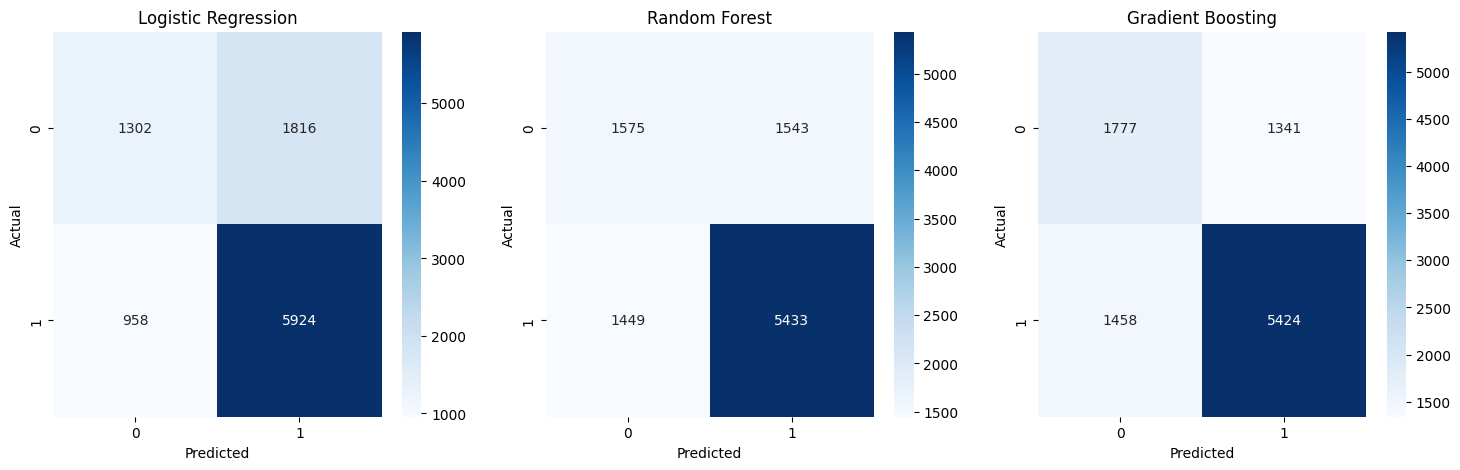

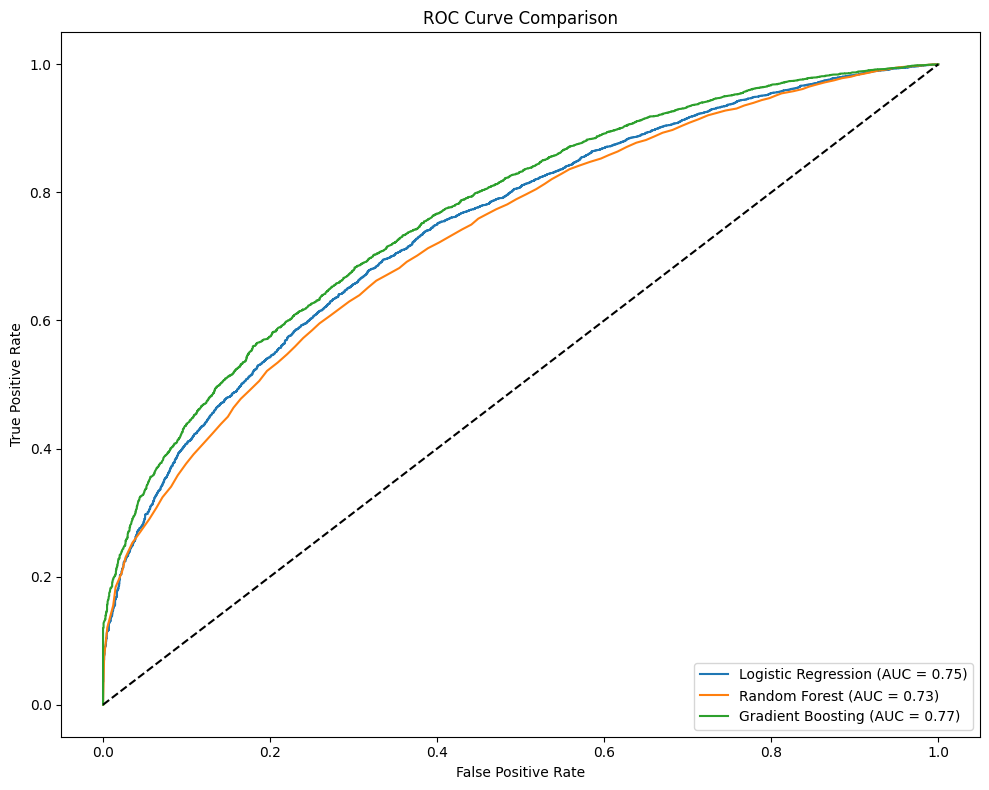


Model Comparison (After Feature Engineering):
                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression    0.7226   0.765375  0.860796  0.810286   
1        Random Forest    0.7008   0.778813  0.789451  0.784096   
2    Gradient Boosting    0.7201   0.801774  0.788143  0.794900   

   Training Time (s)  
0           0.175019  
1          10.029237  
2          12.811765  


In [ ]:

results = []
predictions = {}
probabilities = {}

# Visualization setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt_roc = plt.figure(figsize=(10, 8))
ax_roc = plt_roc.add_subplot(111)

for i, (name, model) in enumerate(models.items()):
    # Train and Time
    start_time = time.time()
    model.fit(X_train_scaled, y_train_resampled)
    end_time = time.time()
    training_time = end_time - start_time

    # Predict
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Store for later (DO NOT REMOVE)
    predictions[name] = y_pred
    probabilities[name] = y_prob

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "Training Time (s)": training_time
    })

    # Print Report
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize ROC Plot
ax_roc.plot([0, 1], [0, 1], 'k--')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curve Comparison')
ax_roc.legend(loc="lower right")

plt.tight_layout()
plt.show()
plt_roc.show()

# Summary Table
results_df = pd.DataFrame(results)
print("\nModel Comparison (After Feature Engineering):")
print(results_df)

# **Machine Learning Model on Scale data using class weight**

Training models with Class Balancing...
--- Logistic Regression (Balanced) ---
              precision    recall  f1-score   support

           0       0.50      0.66      0.57      3118
           1       0.82      0.69      0.75      6882

    accuracy                           0.69     10000
   macro avg       0.66      0.68      0.66     10000
weighted avg       0.72      0.69      0.69     10000

--- Random Forest (Balanced) ---
              precision    recall  f1-score   support

           0       0.55      0.42      0.47      3118
           1       0.76      0.84      0.80      6882

    accuracy                           0.71     10000
   macro avg       0.65      0.63      0.64     10000
weighted avg       0.69      0.71      0.70     10000

--- Gradient Boosting (Balanced) ---
              precision    recall  f1-score   support

           0       0.49      0.71      0.58      3118
           1       0.84      0.67      0.74      6882

    accuracy                     

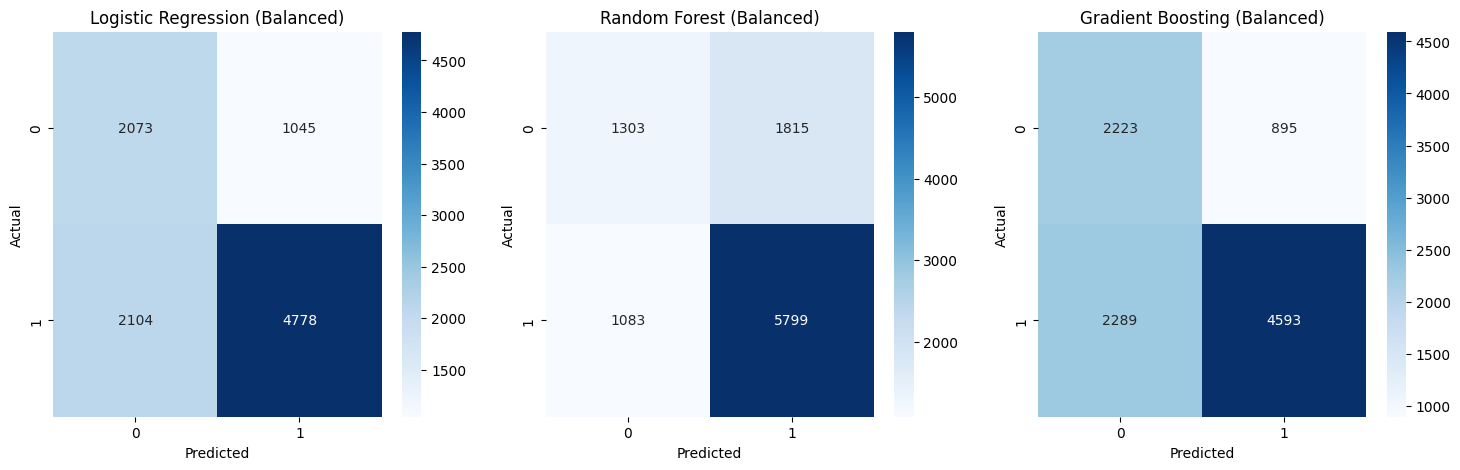

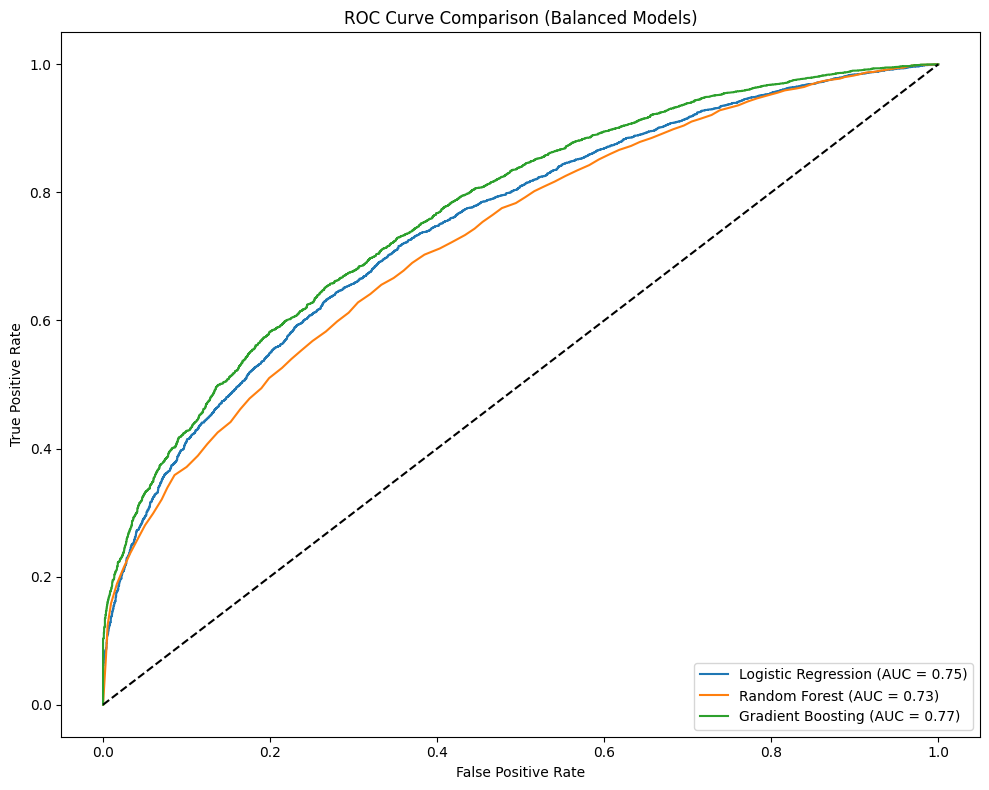


Model Comparison (With Class Weight Balancing):
                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression    0.6851   0.820539  0.694275  0.752145   
1        Random Forest    0.7102   0.761623  0.842633  0.800083   
2    Gradient Boosting    0.6816   0.836917  0.667393  0.742603   

   Training Time (s)  
0           0.185495  
1           9.606656  
2           8.860689  


In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

# Split Data
X = df.drop('lung_cancer', axis=1)
y = df['lung_cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# --- Define Models with Class Weighting ---
models = {
    # Built-in parameter handles balancing automatically
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),

    # Built-in parameter handles balancing automatically
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),

    # Gradient Boosting does NOT support class_weight param; we will handle it in the loop via sample_weight
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = []
predictions = {}
probabilities = {}

# Visualization setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt_roc = plt.figure(figsize=(10, 8))
ax_roc = plt_roc.add_subplot(111)

# --- Compute Sample Weights for Gradient Boosting ---
# This creates a weight for every single row in X_train based on its class
gb_sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

print("Training models with Class Balancing...")

for i, (name, model) in enumerate(models.items()):
    start_time = time.time()

    # --- TRAINING LOGIC ---
    # Gradient Boosting requires explicit sample_weights passed to .fit()
    if name == "Gradient Boosting":
        model.fit(X_train_scaled, y_train, sample_weight=gb_sample_weights)
    else:
        # Logistic Regression and Random Forest handle it internally via class_weight='balanced'
        model.fit(X_train_scaled, y_train)

    end_time = time.time()
    training_time = end_time - start_time

    # Predict
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Store for later
    predictions[name] = y_pred
    probabilities[name] = y_prob

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "Training Time (s)": training_time
    })

    # Print Report
    print(f"--- {name} (Balanced) ---")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name} (Balanced)')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

    # ROC Curve Plot
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize ROC Plot
ax_roc.plot([0, 1], [0, 1], 'k--')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curve Comparison (Balanced Models)')
ax_roc.legend(loc="lower right")

plt.tight_layout()
plt.show()
plt_roc.show()

# Summary Table
results_df = pd.DataFrame(results)
print("\nModel Comparison (With Class Weight Balancing):")
print(results_df)

# **Define K-Fold Strategy**

In [ ]:

from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline as ImbPipeline

# ---  Define K-Fold Strategy ---
# StratifiedKFold ensures each fold has the same % of cancer cases as the original data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

print("Starting 5-Fold Cross-Validation (with SMOTE inside folds)...\n")

for name, model in models.items():
    # Construct the pipeline
    pipeline = ImbPipeline(steps=[
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    # Run Cross-Validation
    cv_scores = cross_validate(pipeline, X, y, cv=cv,
                               scoring=['accuracy', 'precision', 'recall', 'f1'],
                               n_jobs=-1)

    # Calculate Mean and Standard Deviation
    acc_mean = np.mean(cv_scores['test_accuracy'])
    acc_std = np.std(cv_scores['test_accuracy'])

    prec_mean = np.mean(cv_scores['test_precision'])
    prec_std = np.std(cv_scores['test_precision'])

    rec_mean = np.mean(cv_scores['test_recall'])
    rec_std = np.std(cv_scores['test_recall'])

    f1_mean = np.mean(cv_scores['test_f1'])
    f1_std = np.std(cv_scores['test_f1'])

    # Store Results (Formatted as String for Table)
    results.append({
        "Model": name,
        "Accuracy": f"{acc_mean:.4f} ± {acc_std:.4f}",
        "Precision": f"{prec_mean:.4f} ± {prec_std:.4f}",
        "Recall": f"{rec_mean:.4f} ± {rec_std:.4f}",
        "F1 Score": f"{f1_mean:.4f} ± {f1_std:.4f}"
    })

    # Print Output with Std Dev
    print(f"--- {name} ---")
    print(f"Accuracy:  {acc_mean:.4f} (+/- {acc_std:.4f})")
    print(f"Precision: {prec_mean:.4f} (+/- {prec_std:.4f})")
    print(f"Recall:    {rec_mean:.4f} (+/- {rec_std:.4f})")
    print(f"F1 Score:  {f1_mean:.4f} (+/- {f1_std:.4f})\n")

# --- 3. Display Final Comparison Table ---
results_df = pd.DataFrame(results)
print("\nFinal Cross-Validation Results (Mean ± Std Dev):")
print(results_df)

Starting 5-Fold Cross-Validation (with SMOTE inside folds)...

--- Logistic Regression ---
Accuracy:  0.6816 (+/- 0.0016)
Precision: 0.8185 (+/- 0.0035)
Recall:    0.6897 (+/- 0.0061)
F1 Score:  0.7486 (+/- 0.0024)

--- Random Forest ---
Accuracy:  0.6752 (+/- 0.0046)
Precision: 0.7907 (+/- 0.0039)
Recall:    0.7172 (+/- 0.0040)
F1 Score:  0.7522 (+/- 0.0036)

--- Gradient Boosting ---
Accuracy:  0.6895 (+/- 0.0018)
Precision: 0.8292 (+/- 0.0037)
Recall:    0.6904 (+/- 0.0023)
F1 Score:  0.7535 (+/- 0.0009)


Final Cross-Validation Results (Mean ± Std Dev):
                 Model         Accuracy        Precision           Recall  \
0  Logistic Regression  0.6816 ± 0.0016  0.8185 ± 0.0035  0.6897 ± 0.0061   
1        Random Forest  0.6752 ± 0.0046  0.7907 ± 0.0039  0.7172 ± 0.0040   
2    Gradient Boosting  0.6895 ± 0.0018  0.8292 ± 0.0037  0.6904 ± 0.0023   

          F1 Score  
0  0.7486 ± 0.0024  
1  0.7522 ± 0.0036  
2  0.7535 ± 0.0009  


# **SHAP & LIME**

In [ ]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0c354111de395db330cb42b8463105447238b3a186effd8e81437af76d805b6b
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
# Split Data
X = df.drop('lung_cancer', axis=1)
y = df['lung_cancer']
feature_names = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to Train Data Only
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Scale Data (Fit on Train, Transform Test)
# Note: For XAI, it's often better to interpret unscaled data if possible,
# but since the model requires scaling, we interpret the scaled values or use a wrapper.
# Here we stick to the scaled pipeline for consistency with previous results.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)
# Convert back to DataFrame for SHAP/LIME to have column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Train Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled_df, y_train_bal)

print(f"Model Accuracy on Test Set: {accuracy_score(y_test, gb_model.predict(X_test_scaled_df)):.4f}")

Model Accuracy on Test Set: 0.7201


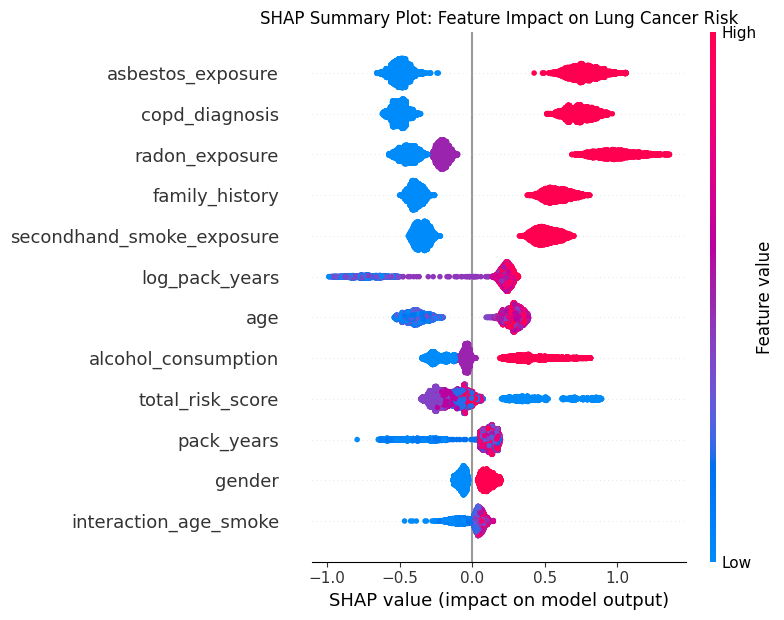

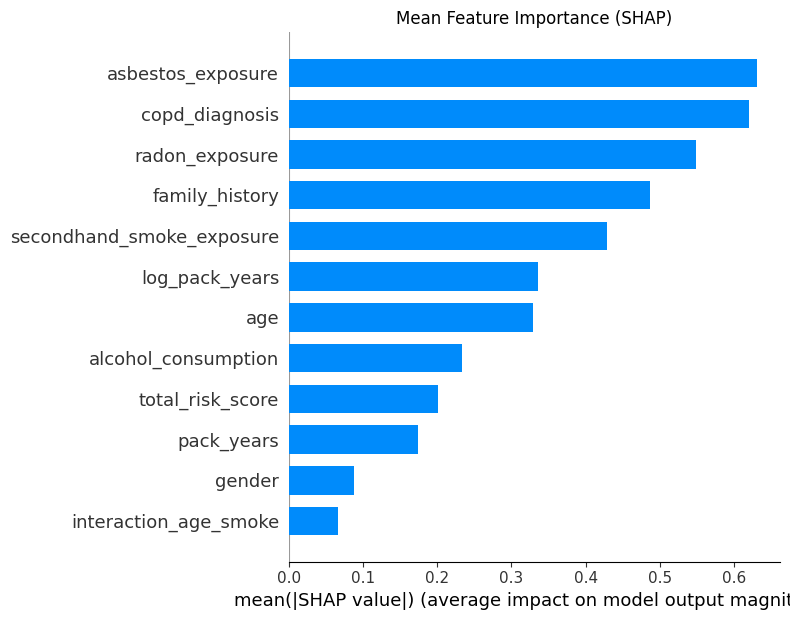

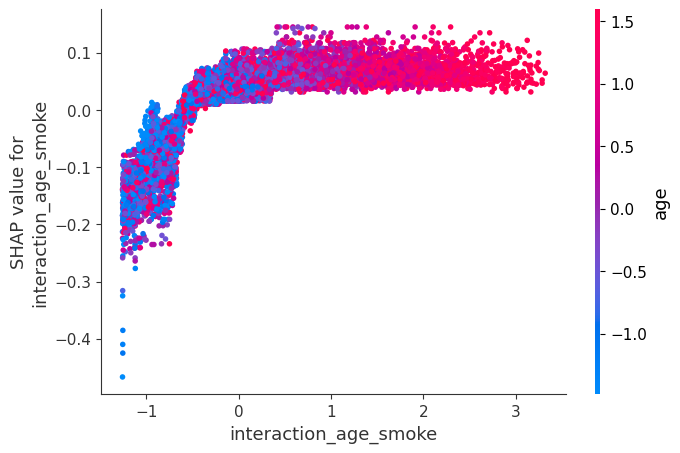

In [ ]:
import shap
import lime
import lime.lime_tabular
# Initialize SHAP Explainer
# TreeExplainer is optimized for Tree-based models like Gradient Boosting
explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(X_test_scaled_df)

# 1. SHAP Summary Plot (Beeswarm)
plt.figure(figsize=(10, 6))
plt.title("SHAP Summary Plot: Feature Impact on Lung Cancer Risk")
# Note: For binary classification, shap_values might be a list. We take index 1 for the positive class (Cancer).
if isinstance(shap_values, list):
    vals = shap_values[1]
else:
    vals = shap_values
shap.summary_plot(vals, X_test_scaled_df, show=True)

# 2. SHAP Bar Plot (Mean Importance)
plt.figure(figsize=(10, 6))
plt.title("Mean Feature Importance (SHAP)")
shap.summary_plot(vals, X_test_scaled_df, plot_type="bar", show=True)

# 3. Dependence Plot for Top Feature
# This helps check alignment with clinical knowledge (e.g., does risk increase linearly with smoking?)
top_feature = 'interaction_age_smoke'
shap.dependence_plot(top_feature, vals, X_test_scaled_df, interaction_index='age', show=True)

In [ ]:
# Initialize LIME Explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_scaled),
    feature_names=feature_names,
    class_names=['No Cancer', 'Cancer'],
    mode='classification'
)

# Pick a specific patient (e.g., a high-risk True Positive)
# We look for an index where y_test is 1 and the model predicted 1
y_pred = gb_model.predict(X_test_scaled_df)
high_risk_indices = np.where((y_test == 1) & (y_pred == 1))[0]
patient_idx = high_risk_indices[0] # Take the first one found

print(f"Explaining prediction for Test Patient #{patient_idx}")
print(f"Actual Label: {y_test.iloc[patient_idx]} (Cancer)")
print(f"Predicted: {y_pred[patient_idx]} (Cancer)")

# Generate Explanation
# num_features=5 shows the top 5 factors contributing to this specific decision
exp = lime_explainer.explain_instance(
    data_row=X_test_scaled[patient_idx],
    predict_fn=gb_model.predict_proba,
    num_features=10
)

# Show the plot in the notebook
exp.show_in_notebook(show_table=True)

# To save the explanation as an HTML file (optional)
# exp.save_to_file('lime_patient_explanation.html')

Explaining prediction for Test Patient #2
Actual Label: 1 (Cancer)
Predicted: 1 (Cancer)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
